# Στατική με Μητρώα - Παράδειγμα 2

In [10]:
import sympy as sym
from sympy import Matrix

from IPython.display import Image

## Ορισμός των συμβόλων που θα χρησιμοποιηθούν στην επίλυση του προβλήματος

In [11]:
A, E, I, L = sym.symbols('A E I L')
U1, U2, U3, U4, U5, U6 = sym.symbols('U1 U2 U3 U4 U5 U6')
P1, P2, P3, P4, P5, P6 = sym.symbols('P1 P2 P3 P4 P5 P6')
R1, R2, R3, R4, R5, R6 = sym.symbols('R1 R2 R3 R4 R5 R6')

## Καθορισμός μητρώων και διανυσμάτων

### Μητρώο στιβαρότητας

In [12]:
K = Matrix([[A*E/L, 0, 0, -A*E/L, 0, 0],
        [0, 12*E*I/L**3, 6*E*I/L**2, 0, -12*E*I/L**3, 6*E*I/L**2],
        [0, 6*E*I/L**2, 4*E*I/L, 0, -6*E*I/L**2, 2*E*I/L],
        [-A*E/L, 0, 0, A*E/L, 0, 0],
        [0, -12*E*I/L**3, -6*E*I/L**2, 0, 12*E*I/L**3, -6*E*I/L**2],
        [0, 6*E*I/L**2, 2*E*I/L, 0, -6*E*I/L**2, 4*E*I/L]])

K

Matrix([
[ A*E/L,            0,           0, -A*E/L,            0,           0],
[     0,  12*E*I/L**3,  6*E*I/L**2,      0, -12*E*I/L**3,  6*E*I/L**2],
[     0,   6*E*I/L**2,     4*E*I/L,      0,  -6*E*I/L**2,     2*E*I/L],
[-A*E/L,            0,           0,  A*E/L,            0,           0],
[     0, -12*E*I/L**3, -6*E*I/L**2,      0,  12*E*I/L**3, -6*E*I/L**2],
[     0,   6*E*I/L**2,     2*E*I/L,      0,  -6*E*I/L**2,     4*E*I/L]])

### Μητρώο παραμορφώσεων

In [13]:
U = Matrix([[U1], [U2], [U3], [U4], [U5], [U6]])
U

Matrix([
[U1],
[U2],
[U3],
[U4],
[U5],
[U6]])

### Μητρώο δυνάμεων

In [14]:
P = Matrix([[P1], [P2], [P3], [P4], [P5], [P6]])
P

Matrix([
[P1],
[P2],
[P3],
[P4],
[P5],
[P6]])

### Μητρώο αντιδράσεων

In [15]:
R = Matrix([[R1], [R2], [R3], [R4], [R5], [R6]])
R

Matrix([
[R1],
[R2],
[R3],
[R4],
[R5],
[R6]])

## Παράδειγμα 2 - Επίλυση αμφιέρειστης

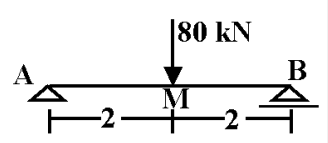

In [16]:
Image('https://raw.githubusercontent.com/panagop/ihu_courses/main/shared/images/mitroa/example2/ekfonisi_1.png', width=400)

### Υπολογισμός παραμέτρων παραδείγματος

In [17]:
A_example = 0.08                # m^2
I_example = 0.002               # m^4
E_example = 1.0e10              # Pa
L_example = 4.0                 # m
P_example = 80_000.0            # N/m


### Αντικατάσταση τιμών στο μητρώο στιβαρότητας

In [18]:
k_example = K.subs(A, A_example).subs(E, E_example).subs(I, I_example).subs(L, L_example)
k_example

Matrix([
[ 200000000.0,          0,          0, -200000000.0,          0,          0],
[           0,  3750000.0,  7500000.0,            0, -3750000.0,  7500000.0],
[           0,  7500000.0, 20000000.0,            0, -7500000.0, 10000000.0],
[-200000000.0,          0,          0,  200000000.0,          0,          0],
[           0, -3750000.0, -7500000.0,            0,  3750000.0, -7500000.0],
[           0,  7500000.0, 10000000.0,            0, -7500000.0, 20000000.0]])

### Αντικατάσταση τιμών στο μητρώο δυνάμεων

Θεωρώντας αμφίπακτη δοκό, οι τιμές των δυνάμεων στα άκρα είναι σύμφωνα με τις σχέσεις:


$P_A = P_B = P_2=P_5=-P/2$

$M_A = P_3= - P\cdot L/8$

$M_B = P_6= P\cdot L/8$

![uniform](uniform.png) 

In [19]:
PA_example = PB_example = - P_example / 2
MA_example = - P_example * L_example / 8
MB_example = -MA_example
p_example = P.subs(P1, 0).subs(P2, PA_example).subs(P3, MA_example).subs(P4, 0).subs(P5, PB_example).subs(P6, MB_example)
p_example

Matrix([
[       0],
[-40000.0],
[-40000.0],
[       0],
[-40000.0],
[ 40000.0]])

## Υπολογισμός των παραμορφώσεων και των αντιδράσεων

Στόχος είναι η επίλυση της μητρωικής εξίσωσης:

$ [k] \cdot [u] = [P] + [R]$

στην οποία όμως υπάρχουν 2 άγνωστοι, οι πίνακες $[u]$ και $[R]$.

Επιπλέον, παρατηρείται ότι το μητρώο στιβαρότητας δεν μπορεί να αντιστραφεί καθώς η ορίζουσά του είναι μεδενική.

In [20]:
# Υπολογισμός ορίζουσας του μητρώου στιβαρότητας
k_example.det()

0

### Αντικατάσταση γνωστών τιμών στα μητρώα αντιδράσεων και παραμορφώσεων

Στο μητρώο αντιδράσεων, οι αντιδράσεις $R_3$, $R_4$, $R_6$, ενώ αντίστοιχα, στο μητρώο παραμορφώσεων οι παραμορφώσεις $U_1$, $U_2$, $U_5$ θα είναι μηδενικές.

In [21]:
R3_example, R4_example, R6_example = sym.symbols('R3_example R4_example R6_example')
r_example = R.subs(R1, 0).subs(R2, 0).subs(R3, R3_example).subs(R4, R4_example).subs(R5, 0).subs(R6, R6_example)
r_example

Matrix([
[         0],
[         0],
[R3_example],
[R4_example],
[         0],
[R6_example]])

In [22]:
U3_example, U4_example, U6_example = sym.symbols('U3_example U4_example U6_example')
u_example = U.subs(U1, 0).subs(U2, 0).subs(U3, U3_example).subs(U4, U4_example).subs(U5, 0).subs(U6, U6_example)
u_example

Matrix([
[         0],
[         0],
[U3_example],
[U4_example],
[         0],
[U6_example]])

### Διαχωρισμός σε υπομητρώα

Παρατηρείται ότι αν θεωρηθεί το υπομητρώο με τα τελευταία 3 στοιχεία των πινάκων $[k]$, $[P]$, $[R]$ και $[u]$, τότε η μητρωική εξίσωση γίνεται:

$ [k_{346}] \cdot [u_{346}] = [P_{346}] + [R_{346}]$

όπου μάλιστα το $[R_{346}]$ είναι μηδενικό.

In [23]:
k_346 = Matrix(k_example[[2, 3, 5], [2,3,5]])
p_346 = Matrix(p_example[[2, 3, 5], 0])
r_346 = Matrix(r_example[[2, 3, 5], 0])
u_346 = Matrix(u_example[[2, 3, 5], 0])


In [24]:
k_346

Matrix([
[20000000.0,           0, 10000000.0],
[         0, 200000000.0,          0],
[10000000.0,           0, 20000000.0]])

In [25]:
r_346

Matrix([
[R3_example],
[R4_example],
[R6_example]])

In [26]:
u_346

Matrix([
[U3_example],
[U4_example],
[U6_example]])

In [27]:
p_346

Matrix([
[-40000.0],
[       0],
[ 40000.0]])

Από τον πολλαπλασιασμό των $ [k_{346}] \cdot [u_{346}]$ και την εξίσωση του γινομένου με το $[P_{346}]$ προκύπτει ένα σύστημα 3x3 εξισώσεων, όπου φυσικά $U_4=0 $ οπότε καταλήγουμε σε σύστημα 2x2

In [28]:
k_346 * u_346

Matrix([
[20000000.0*U3_example + 10000000.0*U6_example],
[                       200000000.0*U4_example],
[10000000.0*U3_example + 20000000.0*U6_example]])

Από τη λύση του συστήματος προκύπτουν οι τιμές των παραμορφώσεων $U_3$ και $U_6$.

### Εναλλακτική επίλυση με πράξεις μητρώων


Η εξίσωση:

$ [k_{346}] \cdot [u_{346}] = [P_{346}] + [R_{346}]$

για μηδενικό $[R_{346}]$ μπορεί να γραφτεί και ως:

$ [k_{346}] \cdot [u_{346}] = [P_{346}]$

οπότε 

$ [k_{346}]^{-1}[k_{346}] \cdot [u_{346}] = [k_{346}]^{-1} \cdot [P_{346}]$

$ [u_{346}] = [k_{346}]^{-1} \cdot [P_{346}]$

Το μητρώο $[k_{346}]$ είναι πλέον αντιστρέψιμο

In [29]:
# Το αντίστροφο του μητρώου στιβαρότητας για τα στοιχεία 346
k_346.inv()

Matrix([
[ 6.66666666666667e-8,      0, -3.33333333333333e-8],
[                   0, 5.0e-9,                    0],
[-3.33333333333333e-8,      0,  6.66666666666667e-8]])

In [30]:
u_346_solution = Matrix(k_346.inv() * p_346)
u_346_solution

Matrix([
[-0.004],
[     0],
[ 0.004]])

Το παραπάνω αποτέλεσμα είναι οι τιμές του μητρώου $[u_{346}]$, άρα των παραμορφώσεων $U_3$, $U_4$ και $U_6$.

οπότε πλέον το οι τιμές των U3, U4 και U6 της λύσης μπορούν να αντιστοιχηθούν στις σχετικές μεταβλητές

In [31]:
u_solution = u_example.subs(U3_example, u_346_solution[0]).subs(U4_example, u_346_solution[1]).subs(U6_example, u_346_solution[2])
u_example = u_solution
u_example

Matrix([
[     0],
[     0],
[-0.004],
[     0],
[     0],
[ 0.004]])

Η αρχική μητρωική εξίσωση έχει πλέον ως μόνο άγνωστο το μητρώο [R]:

$ [k] \cdot [u] = [P] + [R]$

οπότε:

$[R] = [k] \cdot [u] - [P]$

In [32]:
r_solution = Matrix(k_example * u_example - p_example)
r_solution


Matrix([
[      0],
[40000.0],
[      0],
[      0],
[40000.0],
[      0]])